# Fire Modes Comparison

## Setting Up

In [1]:
import pandas as pd
from scripts.probability import at_least_one

%run weapon_full_data.ipynb

## Fire Modes Data

Base data. Not taking into account targets or aliens.

In [2]:
weapon_firemodes = weapon_data[ ["fire_mode", "time_units", "average_chance_to_hit", "turn_damage_expected", "damage_per_time_unit"] ]
weapon_firemodes = weapon_firemodes.groupby("fire_mode").mean()
weapon_firemodes

,time_units,average_chance_to_hit,turn_damage_expected,damage_per_time_unit
fire_mode,,,,
aimed,70.666667,0.529375,43.920938,1.129569
auto,38.333333,0.220000,19.479167,1.083333
grenade,75.000000,0.357500,30.387500,1.133333
melee,21.250000,0.783750,259.600000,6.208333
snapshot,36.636364,0.318750,41.536250,1.893377


## Fire Modes Data Agains Aliens

This is more useful. The actual average damages after all calculations have been applied.

In [3]:
weapon_damages_aliens = weapon_data_aliens.groupby(["fire_mode"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["chance_of_hit_and_penetrate", "turn_penetrating_damage_expected", "penetrating_damage_per_time_unit"]]
weapon_damages_aliens

,chance_of_hit_and_penetrate,turn_penetrating_damage_expected,penetrating_damage_per_time_unit
fire_mode,,,
aimed,0.410807,36.207646,0.927128
auto,0.130491,13.794159,0.765712
grenade,0.284983,24.174648,0.901619
melee,0.752170,355.237332,8.500551
snapshot,0.242586,33.962060,1.530300


## Data Merge

Lets mix both data sets.

In [4]:
weapon_firemodes = weapon_firemodes.merge(weapon_damages_aliens, on="fire_mode")

## Chance to Hit

In [5]:
weapon_firemodes_to_hit = pd.DataFrame()
weapon_firemodes_to_hit["to_damage"] = weapon_firemodes["chance_of_hit_and_penetrate"]
weapon_firemodes_to_hit["to_not_damage"] = weapon_firemodes.apply(lambda x: x["average_chance_to_hit"] - x["chance_of_hit_and_penetrate"], axis=1)
weapon_firemodes_to_hit = weapon_firemodes_to_hit.sort_values(by=["to_damage"])

Text(0, 0.5, 'Chance')

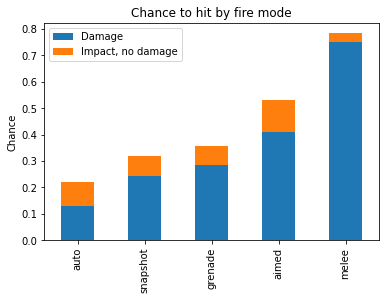

In [6]:
ax = weapon_firemodes_to_hit.plot.bar(title="Chance to hit by fire mode", stacked=True, legend=False)
ax.legend(["Damage", "Impact, no damage"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")

## Damage

In [7]:
weapon_firemodes_damage = pd.DataFrame()
weapon_firemodes_damage["damage"] = weapon_firemodes["turn_penetrating_damage_expected"]
weapon_firemodes_damage["lost_damage"] = weapon_firemodes.apply(lambda x: x["turn_damage_expected"] - x["turn_penetrating_damage_expected"], axis=1)
weapon_firemodes_damage = weapon_firemodes_damage.sort_values(by=["damage"])

Text(0, 0.5, 'Chance')

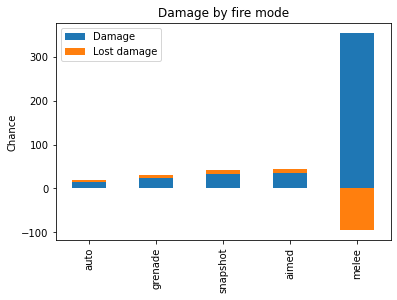

In [8]:
ax = weapon_firemodes_damage.plot.bar(title="Damage by fire mode", stacked=True, legend=False)
ax.legend(["Damage", "Lost damage"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")

## Time Units

In [9]:
weapon_firemodes_tus_average = weapon_data[ ["fire_mode", "time_units"] ]
weapon_firemodes_tus_average = weapon_firemodes_tus_average.groupby("fire_mode").mean()

In [10]:
weapon_firemodes_tus_max = weapon_data[ ["fire_mode", "time_units"] ]
weapon_firemodes_tus_max = weapon_firemodes_tus_max.groupby("fire_mode").max()

In [11]:
weapon_firemodes_tus = pd.DataFrame()
weapon_firemodes_tus["time_units"] = weapon_firemodes_tus_average["time_units"]
weapon_firemodes_tus["up_to_max"] = weapon_firemodes_tus_max["time_units"]
weapon_firemodes_tus["up_to_max"] = weapon_firemodes_tus.apply(lambda x: x["up_to_max"] - x["time_units"], axis=1)
weapon_firemodes_tus = weapon_firemodes_tus.sort_values(by=["time_units"])

Text(0, 0.5, 'Tus')

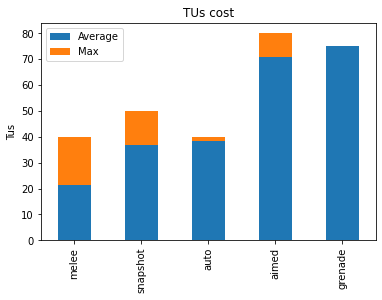

In [12]:
ax = weapon_firemodes_tus.plot.bar(title="TUs cost", stacked=True, legend=False)
ax.legend(["Average", "Max"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Tus")

## Damage Per Time Unit

In [13]:
weapon_firemodes_dam_tu = pd.DataFrame()
weapon_firemodes_dam_tu["damage"] = weapon_firemodes["penetrating_damage_per_time_unit"]
weapon_firemodes_dam_tu["lost_damage"] = weapon_firemodes.apply(lambda x: x["damage_per_time_unit"] - x["penetrating_damage_per_time_unit"], axis=1)
weapon_firemodes_dam_tu = weapon_firemodes_damage.sort_values(by=["damage"])

Text(0, 0.5, 'Ratio')

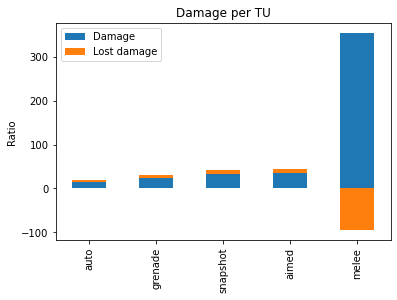

In [14]:
ax = weapon_firemodes_dam_tu.plot.bar(title="Damage per TU", stacked=True, legend=False)
ax.legend(["Damage", "Lost damage"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

## Chance to Hit

In [15]:
at_least_one_compare = weapon_data[["fire_mode", "burst", "accuracy"]]
at_least_one_compare = at_least_one_compare.groupby(["fire_mode"]).mean()

In [16]:
at_least_one_compare["chance"] = at_least_one_compare.apply(lambda x: at_least_one(x["accuracy"]/100, x["burst"]), axis=1)
at_least_one_compare["chance"] = pd.to_numeric(at_least_one_compare["chance"])
at_least_one_compare = at_least_one_compare.drop(["burst", "accuracy"], axis=1)
at_least_one_compare = at_least_one_compare.reset_index()
at_least_one_compare = at_least_one_compare.set_index("fire_mode")
at_least_one_compare = at_least_one_compare.sort_values(by=["chance"])

Text(0, 0.5, 'Chance')

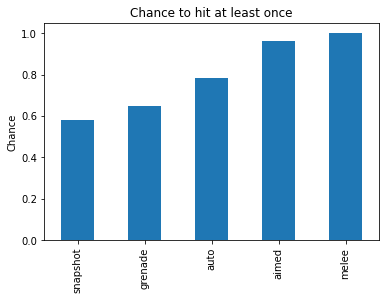

In [17]:
ax = at_least_one_compare.plot.bar(title="Chance to hit at least once", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Chance")